# start2impact | Progetto Advanced Analytics

In [4]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Importazione del primo dataset.

In [6]:
regression_raw_dataset = pd.read_csv('/Users/balac/Downloads/supermarket_sales.csv')

# Esplorazione del dataset

In [ ]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


In [ ]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Non ci sono valori nulli, altri valori invece sono categorici.
<br>Alcune colonne risultano poco utili ai fini dell'analisi per la predizione; si procede quindi all'eliminazione.

In [23]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

In [ ]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Media, mediana, moda e deviazione standard

Si procede al calcolo delle statistiche sulla colonna cui fare le predizioni (la label), ovvero Rating. Essa dà una valutazione alla transazione in base alla redditività della stessa, definendo quanto è stata proficua per la catena di supermercati.

In [25]:
# codice per calcolare la media, mediana e moda della label "Rating"

ratings = regression_dataset['Rating']

media_ratings = np.mean(ratings)
mediana_ratings = np.median(ratings)
moda_ratings = stats.mode(ratings, keepdims=False).mode

print(f"Media:{media_ratings}")
print(f"Mediana:{mediana_ratings}")
print(f"Moda:{moda_ratings}")

Media:6.9727
Mediana:7.0
Moda:6.0


In [ ]:
# codice per calcolare la deviazione standard della label "Rating"

ratings = regression_dataset['Rating']

std_ratings = np.std(ratings)

print(f"Deviazione standard:{std_ratings}")

Deviazione standard:1.7177207893019182


# Come sono distribuiti i valori della label

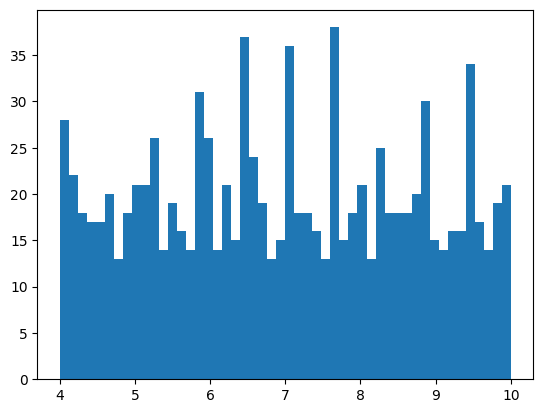

In [ ]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

La distribuzione dei rating è più o meno uniforme e non c'è skewness.
<br>Si procede alla creazione del grafico dell'utile lordo.

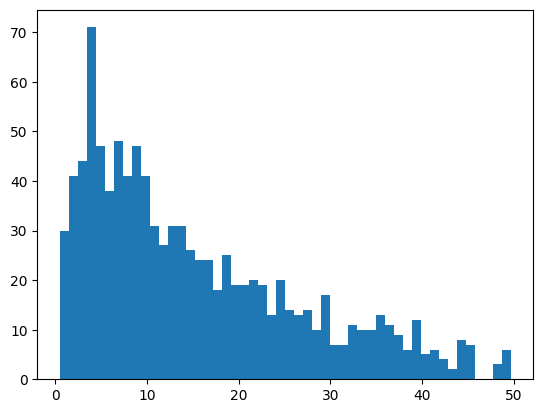

In [ ]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Qui c'è una skewness verso sinistra e e la maggioranza degli ordini sembra avere un income lordo basso.
<br>Si procede quindi al calcolo del valore di questa skewness.

In [ ]:
# Codice per calcolare la skewness del gross income

utile_lordo = regression_dataset['gross income']

skewness_utile_lordo = stats.skew(utile_lordo)

print(f"Skewness utile lordo:{skewness_utile_lordo}")

Skewness utile lordo:0.8912303920037635


# Encoding delle variabili categoriche

In [27]:
# codice per effettuare l'enconding delle variabili categoriche

# lista colonne da convertire
colonne_encoding = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]

# applicazione della funzione one hot encoding importando la libreria e poi applicandola alla variabile data_encoded
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
data_encoded = ohe.fit_transform(regression_dataset[colonne_encoding])

# Creazione di un DataFrame con i dati codificati e i nomi delle nuove colonne
encoded_columns = ohe.get_feature_names_out(colonne_encoding)
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns)

# Concatenazione dei dati originali (senza le colonne codificate) con le nuove colonne codificate
regression_dataset = pd.concat([regression_dataset.drop(columns=colonne_encoding), data_encoded_df], axis=1)

# Visualizzazione del nuovo dataset
print(regression_dataset.head())

   Unit price  Quantity  gross income  Rating  Branch_A  Branch_B  Branch_C  \
0       74.69         7       26.1415     9.1       1.0       0.0       0.0   
1       15.28         5        3.8200     9.6       0.0       0.0       1.0   
2       46.33         7       16.2155     7.4       1.0       0.0       0.0   
3       58.22         8       23.2880     8.4       1.0       0.0       0.0   
4       86.31         7       30.2085     5.3       1.0       0.0       0.0   

   City_Mandalay  City_Naypyitaw  City_Yangon  ...  Gender_Male  \
0            0.0             0.0          1.0  ...          0.0   
1            0.0             1.0          0.0  ...          0.0   
2            0.0             0.0          1.0  ...          1.0   
3            0.0             0.0          1.0  ...          1.0   
4            0.0             0.0          1.0  ...          1.0   

   Product line_Electronic accessories  Product line_Fashion accessories  \
0                                  0.0        

# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che presenta appunto una grossa skewness in modo da migliorare la performance dei modelli.

In [29]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"
# inizializzazione della funzione
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ["Unit price", "gross income"]

# applicazione della funzione
regression_dataset[features] = scaler.fit_transform(regression_dataset[features])
regression_dataset.head()

,Unit price,Quantity,gross income,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.718160,7,0.919607,9.1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.525303,5,-0.987730,9.6,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.352781,7,0.071446,7.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.096214,8,0.675780,8.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.156959,7,1.267125,5.3,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Train e Test Split

In [31]:
from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set

# features
x = regression_dataset.drop(columns=["Rating"])
# label
y = regression_dataset["Rating"]

# train-test split con ratio 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

# codice per rendere x e y della stessa dimensione
min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

# dimensioni di train e test
print(f"Dimensioni di x_train: {x_train.shape}")
print(f"Dimensioni di x_test: {x_test.shape}")
print(f"Dimensioni di y_train: {y_train.shape}")
print(f"Dimensioni di y_test: {y_test.shape}")

Dimensioni di x_train: (800, 22)
Dimensioni di x_test: (200, 22)
Dimensioni di y_train: (800,)
Dimensioni di y_test: (200,)


# Linear Regression

Prima predizione dei valori **Rating**.

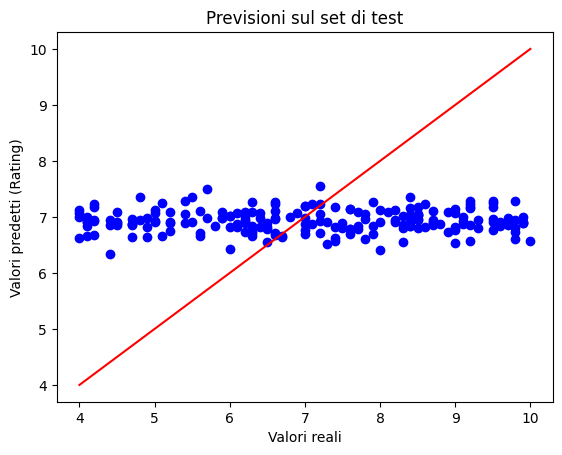

In [ ]:
# training del modello con la linear regression

# inizializzazione del modello
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# addestramento del modello
regressor.fit(x_train, y_train)

# predizione dei valori della label sul test dataset
y_pred_test = regressor.predict(x_test)

# rappresentazione grafica dei risultati ottenuti
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Previsioni sul set di test")
plt.xlabel("Valori reali")
plt.ylabel("Valori predetti (Rating)")
plt.show()

Valutazione delle performance del training.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)

print(f"MSE = {MSE}")
print(f"\nMAE = {MAE}")

MSE = 3.0693774267605263

MAE = 1.505810216975349


# Polynomial Regression

Seconda predizione dei valori **Rating**.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


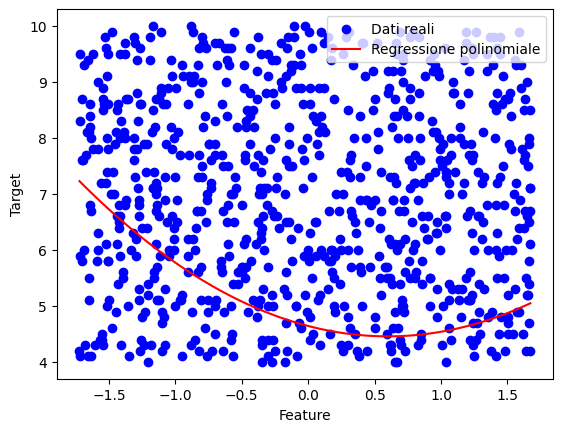

In [ ]:
# training del modello con la polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Trasformazione polinomiale
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Training del modello
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

# Predizioni
y_pred_poly = regressor.predict(x_test_poly)

# codice per far si che x_train sia un array NumPy
x_train_np = x_train.to_numpy() if hasattr(x_train, "to_numpy") else x_train

# scelta della feature da visualizzare
feature_index = 0  # Puoi cambiare indice per altre feature

# Creazione di punti per il grafico fluido
x_range = np.linspace(x_train_np[:, feature_index].min(),
                      x_train_np[:, feature_index].max(),
                      100).reshape(-1, 1)

# Estensione di x_range a tutte le feature
x_range_full = np.zeros((100, x_train_np.shape[1]))  # Matrice di zeri
x_range_full[:, feature_index] = x_range[:, 0]  # Modifica solo la colonna scelta

# Trasformazione in polinomiale
x_range_poly = poly_features.transform(x_range_full)
y_range_pred = regressor.predict(x_range_poly)

# Grafico scatter
plt.scatter(x_train_np[:, feature_index], y_train, color="blue", label="Dati reali")

# Curva della regressione polinomiale
plt.plot(x_range[:, 0], y_range_pred, color="red", label="Regressione polinomiale")

plt.xlabel(f"Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [ ]:
MSE = mean_squared_error(y_test, y_pred_poly)
MAE = mean_absolute_error(y_test, y_pred_poly)

print(f"MSE = {MSE}")
print(f"\nMAE = {MAE}")

MSE = 3.353772542119024

MAE = 1.568620672435486


**Addestrando lo stesso dataset di training, con l'algoritmo della regressione polinomiale non ci sono grossi cambiamenti.
<br> Anzi, c'è addirittura un leggero peggioramento.**

# Logistic Regression

Si procede all'importazione di un nuovo dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

In [38]:
# codice per importare il dataset apple_quality

classification_dataset = pd.read_csv('/Users/balac/Downloads/apple_quality.csv')

In [ ]:
# codice per print delle prime 50 righe

classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [ ]:
# codice per visualizzare i principali metadata del dataset apple_quality

classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Il dataset è già pulito e quasi tutte le colonne sono numeriche.

In [47]:
# codice per effettuare l'enconding della label "Quality"

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

classification_dataset['Quality'] = label_encoder.fit_transform(classification_dataset['Quality'])

# conversione delle altre colonne object in numeriche
classification_dataset['Acidity'] = pd.to_numeric(classification_dataset['Acidity'], errors="coerce")
classification_dataset.info()

# verifica dell'encoding
classification_dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4001 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 265.8 KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


Si procede poi a ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [49]:
# codice per splittare in train/test il dataset apple_quality

from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set

# features
x = classification_dataset.drop(columns=["Quality"])
# label
y = classification_dataset["Quality"]

# train-test split 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

# codice per far si che x e y abbiano la stessa dimensione
min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

# dimensioni di train e test
print(f"Dimensioni di x_train: {x_train.shape}")
print(f"Dimensioni di x_test: {x_test.shape}")
print(f"Dimensioni di y_train: {y_train.shape}")
print(f"Dimensioni di y_test: {y_test.shape}")

print(x_train.isna().sum())  # Conta i NaN per colonna
print(y_train.isna().sum())

# sostituzione dei valori nulli con la media della colonna
x_train = x_train.fillna(x_train.mean())

Dimensioni di x_train: (3200, 8)
Dimensioni di x_test: (801, 8)
Dimensioni di y_train: (3200,)
Dimensioni di y_test: (801,)
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
dtype: int64
0


Si procede infine a usare la logistic regression per allenare il modello vero e proprio:

In [51]:
# codice per addestrare il modello usando la logistic regression

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(x_train, y_train)
y_pred = logistic_regressor.predict(x_test)

C:\Users\balac\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calcolo della metrica ***F1 score*** che permette subito di valutare la bontà del modello.
<br> Assieme alla media della precision e del recall, dovrebbe essere superiore a 0.80:

In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

y_predict_test = logistic_regressor.predict(x_test)

# calcolo e visualizzazione delle metriche di valutazione
print(classification_report(y_test, y_predict_test))

# calcolo di f1 score
f1 = f1_score(y_test, y_predict_test, average='weighted')
precision = precision_score(y_test, y_predict_test, average='weighted')
recall = recall_score(y_test, y_predict_test, average='weighted')

# check se i valori sono superiori a 0.80
if f1 > 0.80:
  print("F1 score è superiore a 0.80, il modello è buono!")
else:
  print("F1 score è inferiore a 0.80, il modello va migliorato.")
if precision > 0.80:
  print("Precision è superiore a 0.80, il modello è buono!")
else:
  print("Precision è inferiore a 0.80, il modello va migliorato.")
if recall > 0.80:
  print("Recall è superiore a 0.80, il modello è buono!")
else:
  print("Recall è inferiore a 0.80, il modello va migliorato.")

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       403
           1       0.77      0.76      0.76       398

    accuracy                           0.77       801
   macro avg       0.77      0.77      0.77       801
weighted avg       0.77      0.77      0.77       801

F1 score è inferiore a 0.80, il modello va migliorato.
Precision è inferiore a 0.80, il modello va migliorato.
Recall è inferiore a 0.80, il modello va migliorato.


Si procede alla rappresentazione della **confusion matrix**, per sapere quali sono le categorie migliori del modello appena costruito.

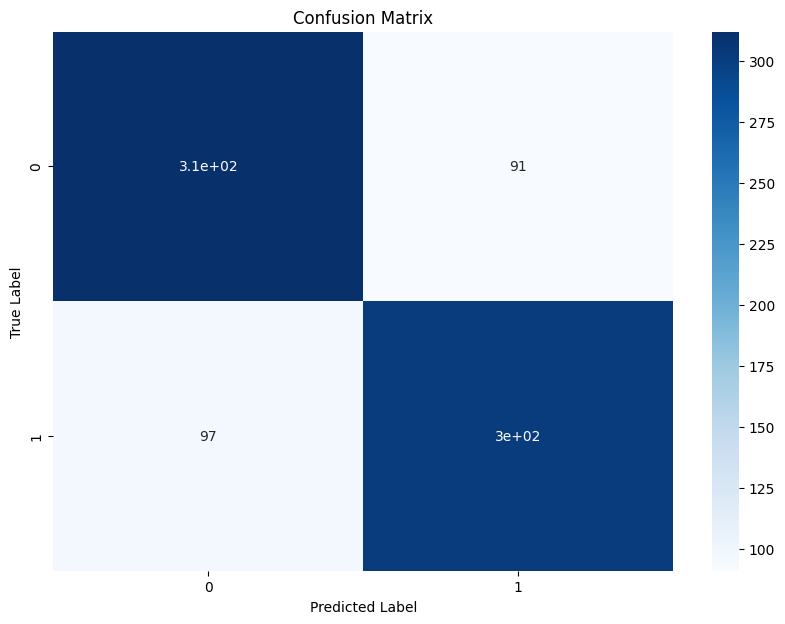

In [ ]:
# codice per la confusion matrix

from sklearn.metrics import confusion_matrix

# calcolo della confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

# creazione di un dataframe per la visualizzazione
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# mostra la confusion matrix come heatmap
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

Si procede alla creazione di un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.

In [ ]:
# addestramento del modello con un decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# creazione del modello
decision_tree_model = DecisionTreeClassifier(random_state=42)

# addestramento del modello
decision_tree_model.fit(x_train, y_train)

# previsioni sul test set
y_predict_test_tree = decision_tree_model.predict(x_test)

# valutazione delle prestazioni
print(classification_report(y_test, y_predict_test_tree))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       403
           1       0.80      0.81      0.80       398

    accuracy                           0.80       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.80      0.80      0.80       801



E poi alla costruzione della confusion matrix:

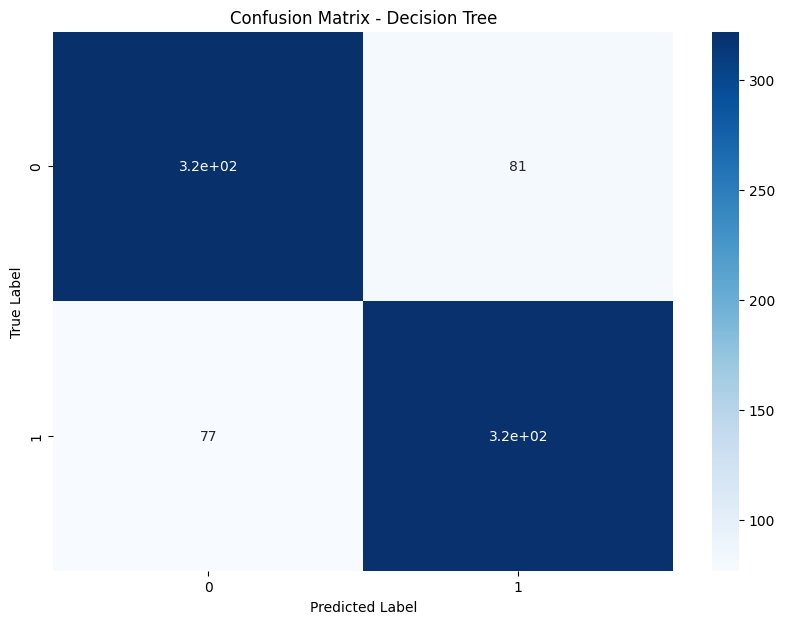

In [ ]:
# confusion matrix del decision tree

from sklearn.metrics import confusion_matrix

# calcolo della confusion matrix
cm_tree = confusion_matrix(y_test, y_predict_test_tree)

# creazione di un dataframe per la visualizzazione
cm_tree_df = pd.DataFrame(cm_tree, index=np.unique(y_test), columns=np.unique(y_test))

# visualizzazione della confusion matrix come heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree_df, annot=True, cmap = 'Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 **Con questo modello i valori F1, precision e recall sono tutti pari o superiori a 0.80.
<br>Il modello Decision Tree è dunque migliore della Logistic Regression.**



Si procede al calcolo della feature importance per scoprire quali sono le feature che sono state più importanti per il decision tree appena costruito.

In [ ]:
# codice per la feature importance

# calcolo dell'importanza delle feature
importances = decision_tree_model.feature_importances_

# creazione di un dataframe per l'importanza delle feature
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# ordinare le feature in base alla loro importanza
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
1         Size    0.220527
6     Ripeness    0.174580
3    Sweetness    0.146540
5    Juiciness    0.140455
2       Weight    0.097536
7      Acidity    0.090300
4  Crunchiness    0.089715
0         A_id    0.040347


# K-Means Clustering

Ultima predizione con un algoritimo non supervisionato.

Si elimina la label che qui non è necessaria:

In [ ]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

Primo tentativo con 2 cluster (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [ ]:
# codice per trainare il modello con K-Means Clustering

# sostituzione dei valori nulli con la mediana
clustering_dataset = clustering_dataset.fillna(clustering_dataset.median())

# importazione e inizializzazione del modello impostando il numero di cluster a 2
from sklearn.cluster import KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# addestramento del modello
kmeans.fit(clustering_dataset)

# creazione delle etichette del cluster e aggiunta al dataset originario
labels = kmeans.labels_
classification_dataset['Cluster'] = labels

# mostrare le ultime righe del dataset con i cluster
print(classification_dataset.head(-50))

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3946  3946.0 -2.045340 -0.586203   0.025982     0.367013  -0.393659 -2.431758   
3947  3947.0 -1.116261 -2.815721  -4.858055    -0.039825   4.504978  6.102587   
3948  3948.0 -2.576074 -0.412264   0.423858     1.067483   0.149400  1.331708   
3949  3949.0 -1.905623 -3.298508  -1.051640    -0.507783  -0.218541  1.866472   
3950  3950.0 -1.578703 -2.307765   3.219000     2.007064   1.812183  0.032768   

       Acidity  Quality  Cl

Si effettua quindi una predizione per vedere a che qualità corrisponde la mela data in input al modello:

In [ ]:
# codice per effettuare la predizione su una mela dalle carattetistiche a piacere

# estrazione della mela a piacere dalla colonna A_id
mela_predizione = clustering_dataset[clustering_dataset["A_id"] == 2.0]

# predizione e mostrare il risultato
predicted_cluster = kmeans.predict(mela_predizione)
print(f"La mela con A_id = 2.0 appartiene al cluster: {predicted_cluster[0]}")

La mela con A_id = 2.0 appartiene al cluster: 0


Nuovo tentativo con 3 cluster (mele buone, intermedie e non buone):

In [ ]:
# nuova inizializzazione del modello impostando 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(clustering_dataset)

# creazione delle etichette del cluster e aggiunta al dataset originario
labels = kmeans.labels_
classification_dataset['Cluster'] = labels

print(classification_dataset.head())

# nuova predizione con la stessa mela di prima
mela_predizione = clustering_dataset[clustering_dataset["A_id"] == 2.0]

predicted_cluster = kmeans.predict(mela_predizione)
print(f"La mela con A_id = 2.0 appartiene al cluster: {predicted_cluster[0]}")

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality  Cluster  
0 -0.491590        1        2  
1 -0.722809        1        2  
2  2.621636        0        2  
3  0.790723        1        2  
4  0.501984        1        2  
La mela con A_id = 2.0 appartiene al cluster: 2


# Time Series

Il primo dataset utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case.
In questo scenario si prova quindi a **capire come i gross income evolvono nel tempo**.

In [66]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"

regression_raw_dataset = pd.read_csv('/Users/balac/Downloads/supermarket_sales.csv')

timeseries_dataset = regression_raw_dataset.loc[:, ['Date', 'gross income']]

# codice per far si che la colonna Date sia nel formato data
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])

# codice per far si che le date siano in ordine cronologico
timeseries_dataset = timeseries_dataset.sort_values(by='Date')

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:
timeseries_dataset.head(100)

,Date,gross income
856,2019-01-01,8.448
567,2019-01-01,29.583
245,2019-01-01,19.036
696,2019-01-01,5.408
523,2019-01-01,6.287
...,...,...
923,2019-01-10,29.099
297,2019-01-10,23.514
568,2019-01-10,27.951
92,2019-01-10,7.693


Si prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

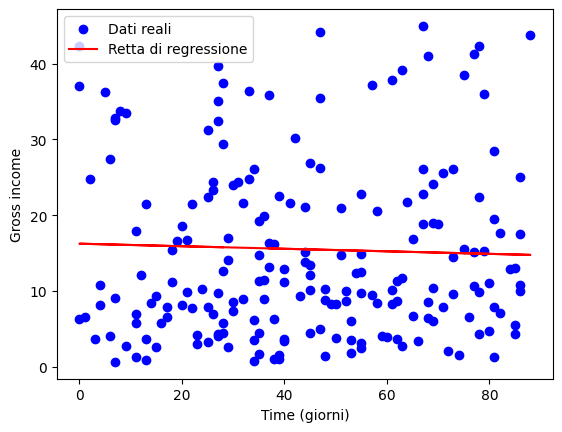

In [ ]:
# training della time series con la linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# viene aggiunta la colonna Time che rappresenta il numero di giorni trascorsi dalla prima data
timeseries_dataset['Time'] = (timeseries_dataset['Date'] - timeseries_dataset['Date'].min()).dt.days

# impostazione della variabile x indipendente e variabile y dipendente
x = timeseries_dataset[['Time']]
y = timeseries_dataset['gross income']

# divisione del dataset in training e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

# inizializzazione e addestramento del modello di regressione lineare
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

# svolgimento delle previsioni sul test set
y_pred = linear_regressor.predict(x_test)

# visualizzazione della retta di regressione insieme ai dati
plt.scatter(x_test, y_test, color='Blue', label='Dati reali')
plt.plot(x_test, y_pred, color='red', label='Retta di regressione')
plt.xlabel('Time (giorni)')
plt.ylabel('Gross income')
plt.legend()
plt.show()

Si calcolano le stesse metriche di prima:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MSE = {MSE}")
print(f"\nMAE = {MAE}")

MSE = 129.6685724452013

MAE = 9.463924127420007


# Conclusioni

**Non tutti gli algoritmi di machine learning performano allo stesso modo.
<br> Occorre fare più tentativi, ma è cruciale scegliere l'algoritmo più adatto al proprio dataset oggetto di studio.**